In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
t = [0.0,5.0,15.0,30.0]

wt_1_30 = [7.975,8.414,12.719,18.548]
wt_10_30 = [23.625,28.924,40.874,86.230]

d_1_30 = [12.987,12.561,13.098,17.461]
d_10_30 = [28.828,33.460,50.374,72.633]

wt_1_42 = [13.127,13.587,13.374,23.561]
wt_10_42 = [24.530,29.403,43.719,77.852]

d_1_42 = [17.140,19.200,19.303,34.784]
d_10_42 = [35.608,43.173,67.717,118.735]

In [3]:
dif_1_30 = [x - wt_1_30[d_1_30.index(x)] for x in d_1_30]
print(dif_1_30)

dif_10_30 = [x - wt_10_30[d_10_30.index(x)] for x in d_10_30]
print(dif_10_30)

dif_1_42 = [x - wt_1_42[d_1_42.index(x)] for x in d_1_42]
print(dif_1_42)

dif_10_42 = [x - wt_10_42[d_10_42.index(x)] for x in d_10_42]
print(dif_10_42)

[5.0120000000000005, 4.147, 0.37900000000000134, -1.0869999999999997]
[5.202999999999999, 4.536000000000001, 9.5, -13.597000000000008]
[4.013, 5.6129999999999995, 5.929, 11.222999999999999]
[11.077999999999996, 13.770000000000003, 23.997999999999998, 40.882999999999996]


In [4]:
print(stats.describe(dif_1_30))
print(stats.describe(dif_10_30))
print(stats.describe(dif_1_42))
print(stats.describe(dif_10_42))

DescribeResult(nobs=4, minmax=(-1.0869999999999997, 5.0120000000000005), mean=2.1127500000000006, variance=8.596037583333333, skewness=-0.07916510581339785, kurtosis=-1.787178772713186)
DescribeResult(nobs=4, minmax=(-13.597000000000008, 9.5), mean=1.410499999999998, variance=104.93895766666675, skewness=-0.9902244209872874, kurtosis=-0.7676840087891796)
DescribeResult(nobs=4, minmax=(4.013, 11.222999999999999), mean=6.6945, variance=9.817795666666663, skewness=0.8992714006396013, kurtosis=-0.8145813617387283)
DescribeResult(nobs=4, minmax=(11.077999999999996, 40.882999999999996), mean=22.432249999999996, variance=182.27843891666666, skewness=0.6524014396205158, kurtosis=-1.152031115831978)


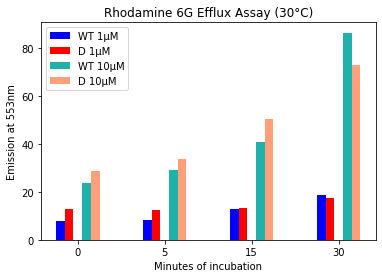

In [5]:
X = ['0','5','15','30']
X_axis = np.arange(len(X))
  
     
plt.bar(X_axis - 0.2, wt_1_30, 0.1, label = 'WT 1µM', color='blue')
plt.bar(X_axis - 0.1, d_1_30, 0.1, label = 'D 1µM',color='red')
plt.bar(X_axis + 0.1, wt_10_30, 0.1, label = 'WT 10µM', color='lightseagreen')
plt.bar(X_axis + 0.2, d_10_30, 0.1, label = 'D 10µM', color='lightsalmon')
  
plt.xticks(X_axis, X)
plt.xlabel("Minutes of incubation")
plt.ylabel("Emission at 553nm")
plt.title("Rhodamine 6G Efflux Assay (30°C)")
plt.legend()
plt.show()

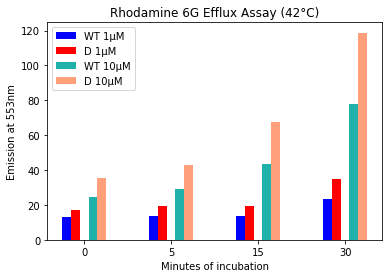

In [6]:
X = ['0','5','15','30']
X_axis = np.arange(len(X))
  
     
plt.bar(X_axis - 0.2, wt_1_42, 0.1, label = 'WT 1µM', color='blue')
plt.bar(X_axis - 0.1, d_1_42, 0.1, label = 'D 1µM',color='red')
plt.bar(X_axis + 0.1, wt_10_42, 0.1, label = 'WT 10µM', color='lightseagreen')
plt.bar(X_axis + 0.2, d_10_42, 0.1, label = 'D 10µM', color='lightsalmon')
  
plt.xticks(X_axis, X)
plt.xlabel("Minutes of incubation")
plt.ylabel("Emission at 553nm")
plt.title("Rhodamine 6G Efflux Assay (42°C)")
plt.legend()
plt.show()

In [7]:
od600dil = {'orf1_orf1':0.132,'orf1_orf2':0.185,'orf1_cheB':0.097,'orf1_cheW':'-','orf2_orf1':0.253,'orf2_orf2':'-','orf2_cheB':0.177,'orf2_cheW':0.239,'cheW_orf1':0.151,'cheW_cheB':0.115,'cheW_cheW':0.179,'cheR_orf1':0.175,'cheR_orf2':'-','cheR_cheB':0.180,'cheR_cheW':0.174}
od420dil = {'orf1_orf1':0.020,'orf1_orf2':0.019,'orf1_cheB':0.020,'orf1_cheW':'-','orf2_orf1':0.023,'orf2_orf2':'-','orf2_cheB':0.022,'orf2_cheW':0.043,'cheW_orf1':0.029,'cheW_cheB':0.024,'cheW_cheW':0.021,'cheR_orf1':0.039,'cheR_orf2':'-','cheR_cheB':0.017,'cheR_cheW':0.026}


In [8]:
def get_undil(dic):
    keys = list(dic.keys())
    vals = list(dic.values())
    vals_new = [x*20 if isinstance(x,float) else x==x for x in vals]
    dict_new = {}
    idx = 0
    while idx<len(vals_new):
        dict_new[keys[idx]]=vals_new[idx]
        idx+=1
    return dict_new

In [9]:
od600 = get_undil(od600dil)

In [10]:
od410 = get_undil(od420dil)

In [11]:
def beta_gal():
    t = 60
    keys = list(od600.keys())
    vals410 = list(od410.values())
    vals600 = list(od600.values())
    beta_gal = {}
    idx = 0
    while idx<len(vals410):
        if isinstance(vals410[idx],float):
            x = (vals410[idx]*1000)/(t*5*vals600[idx])
        else:
            x = '-'
        beta_gal[keys[idx]]=x    
        idx+=1
    return beta_gal

In [12]:
beta_gal = beta_gal()

In [13]:
for x in beta_gal:
    beta_gal_keys = list(beta_gal.keys())
    beta_gal_vals = list(beta_gal.values())
    beta_gal_new = {}
    idx = 0
    while idx<len(beta_gal):
        if isinstance(beta_gal_vals[idx],float):
            beta_gal_new[beta_gal_keys[idx]]=beta_gal_vals[idx]
        else:
            pass
        idx+=1

In [14]:
print(beta_gal_new)
beta_gal_new.pop('orf2_orf1')

{'orf1_orf1': 0.5050505050505051, 'orf1_orf2': 0.34234234234234234, 'orf1_cheB': 0.6872852233676976, 'orf2_orf1': 0.3030303030303029, 'orf2_cheB': 0.41431261770244815, 'orf2_cheW': 0.599721059972106, 'cheW_orf1': 0.6401766004415013, 'cheW_cheB': 0.6956521739130433, 'cheW_cheW': 0.3910614525139665, 'cheR_orf1': 0.7428571428571429, 'cheR_cheB': 0.3148148148148148, 'cheR_cheW': 0.49808429118773956}


0.3030303030303029

Text(0, 0.5, 'beta galactosidase units [units / min * cell]')

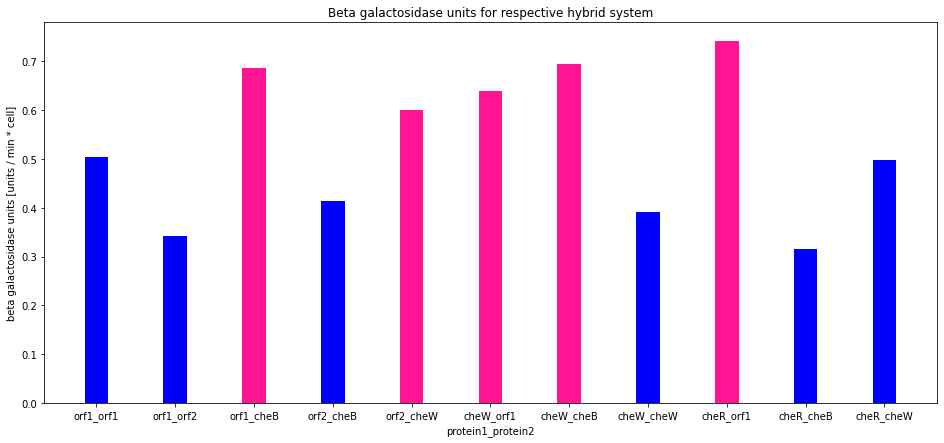

In [15]:
# plt.bar(list(beta_gal_new.keys()),list(beta_gal_new.values()))
plt.figure(figsize=(16, 7))  # width:20, height:3
plt.bar(beta_gal_new.keys(), beta_gal_new.values(), align='center', width=0.3, color='blue')

plt.bar('orf1_cheB',height=beta_gal_new['orf1_cheB'],width=0.3,color='deeppink')
plt.bar('orf2_cheW',height=beta_gal_new['orf2_cheW'],width=0.3,color='deeppink')
plt.bar('cheW_orf1',height=beta_gal_new['cheW_orf1'],width=0.3,color='deeppink')
plt.bar('cheW_cheB',height=beta_gal_new['cheW_cheB'],width=0.3,color='deeppink')
plt.bar('cheR_orf1',height=beta_gal_new['cheR_orf1'],width=0.3,color='deeppink')


plt.title('Beta galactosidase units for respective hybrid system')
plt.xlabel('protein1_protein2')
plt.ylabel('beta galactosidase units [units / min * cell]')

In [16]:
import scipy.stats as stats
import math

In [17]:
beta_gal_new_vals = list(beta_gal_new.values())
stats.describe(beta_gal_new_vals)

DescribeResult(nobs=11, minmax=(0.3148148148148148, 0.7428571428571429), mean=0.5301234749239371, variance=0.023033582982745847, skewness=-0.035376269770915854, kurtosis=-1.4394425778468918)

In [18]:
z_scores = [(x-0.517)/math.sqrt(0.023) for x in beta_gal_new_vals]
print(z_scores)

[-0.07879263636638534, -1.1516584898850561, 1.1228275119649975, -0.6771005475113391, 0.5454465168420853, 0.8122024511040079, 1.1779975500796898, -0.8304141906011857, 1.4892578977696274, -1.3331696312102226, -0.12472649031245159]


In [19]:
math.sqrt(0.023)

0.15165750888103102